### Import Processed data

In [41]:
from Preprocessing import df_imputed, df

Missing values after imputation:
Credit_Score    0
Income          0
Loan_Balance    0
dtype: int64

Imputation completed successfully!
Dataset shape: (500, 22)


## LOGISTIC REGRESSION

In [42]:
df_imputed.isnull().values.any()

np.False_

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                           f1_score, roc_auc_score, roc_curve, confusion_matrix, 
                           ConfusionMatrixDisplay, classification_report)
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Display basic information about the dataset
print("Dataset shape:", df_imputed.shape)
print("\nFirst few rows:")
print(df_imputed.head())

Dataset shape: (500, 22)

First few rows:
  Customer_ID   Age    Income  Credit_Score  Credit_Utilization  \
0    CUST0001  56.0  165580.0         398.0            0.390502   
1    CUST0002  69.0  100999.0         493.0            0.312444   
2    CUST0003  46.0  188416.0         500.0            0.359930   
3    CUST0004  32.0  101672.0         413.0            0.371400   
4    CUST0005  60.0   38524.0         487.0            0.234716   

   Missed_Payments  Delinquent_Account  Loan_Balance  Debt_to_Income_Ratio  \
0              3.0                   0       16310.0              0.317396   
1              6.0                   1       17401.0              0.196093   
2              0.0                   0       13761.0              0.301655   
3              3.0                   0       88778.0              0.264794   
4              2.0                   0       13316.0              0.510583   

  Employment_Status  ...     Location Month_1  Month_2 Month_3  Month_4  \
0          

In [17]:
# Check for missing values
print("\nMissing values per column:")
print(df_imputed.isnull().sum())


Missing values per column:
Customer_ID                 0
Age                         0
Income                      0
Credit_Score                0
Credit_Utilization          0
Missed_Payments             0
Delinquent_Account          0
Loan_Balance                0
Debt_to_Income_Ratio        0
Employment_Status           0
Account_Tenure              0
Credit_Card_Type            0
Location                    0
Month_1                     0
Month_2                     0
Month_3                     0
Month_4                     0
Month_5                     0
Month_6                     0
Credit_Score_was_missing    0
Income_was_missing          0
Loan_Balance_was_missing    0
dtype: int64


In [20]:
# Display target variable distribution
print("\nTarget variable distribution:")
print(df_imputed['Delinquent_Account'].value_counts())


Target variable distribution:
Delinquent_Account
0    420
1     80
Name: count, dtype: int64


In [21]:
# Prepare features and target variable
# Drop Customer_ID as it's just an identifier
X = df_imputed.drop(['Customer_ID', 'Delinquent_Account'], axis=1)
y = df_imputed['Delinquent_Account']

In [22]:
# Define categorical and numerical columns
categorical_cols = ['Employment_Status', 'Credit_Card_Type', 'Location', 
                   'Month_1', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6']
numerical_cols = ['Age', 'Income', 'Credit_Score', 'Credit_Utilization', 
                 'Missed_Payments', 'Loan_Balance', 'Debt_to_Income_Ratio', 'Account_Tenure']

In [23]:
# Create preprocessing pipelines
# For categorical data: OneHotEncoding
categorical_transformer = OneHotEncoder(handle_unknown='ignore', drop='first')

In [24]:
# For numerical data: StandardScaler (optional but recommended for logistic regression)
numerical_transformer = StandardScaler()

In [25]:
# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [26]:
# Create the logistic regression pipeline
logistic_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(
        random_state=42,
        max_iter=1000,
        class_weight='balanced'  # Handle class imbalance if present
    ))
])

In [27]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [28]:
print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Training set size: 400
Test set size: 100


In [29]:
# Fit the model
print("\nTraining the logistic regression model...")
logistic_pipeline.fit(X_train, y_train)


Training the logistic regression model...


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'Income',
                                                   'Credit_Score',
                                                   'Credit_Utilization',
                                                   'Missed_Payments',
                                                   'Loan_Balance',
                                                   'Debt_to_Income_Ratio',
                                                   'Account_Tenure']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Employment_Status',
                                                   'Credit_Card_Type',
                                                   'Location', 'Month_1',
                                                   'Month_2', 'Month_3',
                                                   'Month_4', 'Month_5',
                                                   'Month_6'])])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    random_state=42))])

In [30]:
# Make predictions
y_pred = logistic_pipeline.predict(X_test)
y_pred_proba = logistic_pipeline.predict_proba(X_test)[:, 1]

# Model Performance

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# Save the trained model (optional)
import joblib
joblib.dump(logistic_pipeline, 'delinquency_logistic_model.pkl')
print(f"\nModel saved as 'delinquency_logistic_model.pkl'")


Model saved as 'delinquency_logistic_model.pkl'


In [33]:
# Calculate all metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')
auc = roc_auc_score(y_test, y_pred_proba)

In [34]:
print(f"Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"Precision: {precision:.4f} ({precision*100:.2f}%)")
print(f"Recall:    {recall:.4f} ({recall*100:.2f}%)")
print(f"F1-Score:  {f1:.4f} ({f1*100:.2f}%)")
print(f"AUC-ROC:   {auc:.4f} ({auc*100:.2f}%)")

Accuracy:  0.5400 (54.00%)
Precision: 0.1250 (12.50%)
Recall:    0.3125 (31.25%)
F1-Score:  0.1786 (17.86%)
AUC-ROC:   0.4353 (43.53%)


In [35]:
print("\n" + "="*50)
print("DETAILED CLASSIFICATION REPORT")
print("="*50)
print(classification_report(y_test, y_pred, 
                          target_names=['Not Delinquent', 'Delinquent']))


DETAILED CLASSIFICATION REPORT
                precision    recall  f1-score   support

Not Delinquent       0.82      0.58      0.68        84
    Delinquent       0.12      0.31      0.18        16

      accuracy                           0.54       100
     macro avg       0.47      0.45      0.43       100
  weighted avg       0.71      0.54      0.60       100



In [36]:
# ===== CONFUSION MATRIX =====
print("="*50)
print("CONFUSION MATRIX")
print("="*50)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\nConfusion Matrix Breakdown:")
tn, fp, fn, tp = cm.ravel()
print(f"True Negatives:  {tn} (Correctly predicted Not Delinquent)")
print(f"False Positives: {fp} (Incorrectly predicted Delinquent)")
print(f"False Negatives: {fn} (Incorrectly predicted Not Delinquent)")
print(f"True Positives:  {tp} (Correctly predicted Delinquent)")

CONFUSION MATRIX
[[49 35]
 [11  5]]

Confusion Matrix Breakdown:
True Negatives:  49 (Correctly predicted Not Delinquent)
False Positives: 35 (Incorrectly predicted Delinquent)
False Negatives: 11 (Incorrectly predicted Not Delinquent)
True Positives:  5 (Correctly predicted Delinquent)


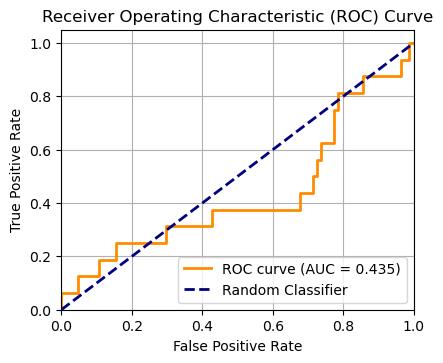

In [37]:
# ===== VISUALIZATIONS =====

# 1. ROC Curve
plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.subplot(2, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)

Text(0.5, 225.12222222222223, 'Predicted Label')

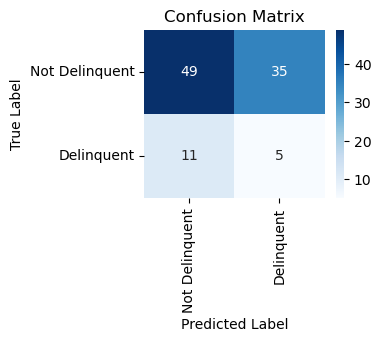

In [38]:
# 2. Confusion Matrix Heatmap
plt.subplot(2, 2, 2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Delinquent', 'Delinquent'],
            yticklabels=['Not Delinquent', 'Delinquent'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

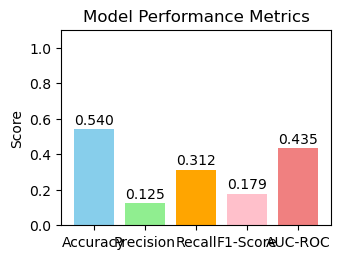

In [39]:
# 4. Metrics Bar Chart
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC'],
    'Score': [accuracy, precision, recall, f1, auc]
})
plt.subplot(2, 2, 4)
bars = plt.bar(metrics_df['Metric'], metrics_df['Score'], 
               color=['skyblue', 'lightgreen', 'orange', 'pink', 'lightcoral'])
plt.title('Model Performance Metrics')
plt.ylabel('Score')
plt.ylim(0, 1.1)
for bar, score in zip(bars, metrics_df['Score']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{score:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [40]:
# Model interpretation
print(f"\n=== MODEL INTERPRETATION ===")
print("Positive coefficients increase the probability of delinquency.")
print("Negative coefficients decrease the probability of delinquency.")
print("Larger absolute values indicate stronger influence on the prediction.")


=== MODEL INTERPRETATION ===
Positive coefficients increase the probability of delinquency.
Negative coefficients decrease the probability of delinquency.
Larger absolute values indicate stronger influence on the prediction.


I evaluated my logistic regression model using multiple classification metrics to comprehensively assess its performance in predicting customer delinquency. The results reveal significant challenges: my model achieved an **accuracy of 54%**, which appears modest but becomes concerning when examined alongside other metrics. The **precision of 12.5%** indicates that when my model predicts a customer will become delinquent, it's only correct about 1 in 8 times, leading to a high rate of false positives that could unfairly flag non-delinquent customers. The **recall of 31.25%** shows I'm only catching about one-third of actual delinquent cases, missing crucial at-risk customers. The **F1-score of 17.86%** reflects the poor balance between precision and recall, while the **AUC-ROC of 43.53%** is particularly troubling as it's below 50%, suggesting my model performs worse than random chance at distinguishing between classes.

To address potential bias and ethical concerns, I plan to examine feature distributions across different demographic groups (particularly by location and employment status) to detect discriminatory patterns that could unfairly impact certain populations. I'll implement fairness metrics like demographic parity and equalized odds to ensure my model doesn't systematically disadvantage protected groups. The ethical implications of predicting financial behavior are substantial—false positives could lead to denied credit or higher rates for creditworthy customers, while false negatives could result in financial losses for the institution. Moving forward, I need to carefully balance business objectives with fair lending practices, potentially implementing model improvements like feature engineering, algorithm selection, or ensemble methods to achieve better performance while maintaining ethical standards. I'll also establish clear governance around how predictions are used in decision-making to prevent automated discrimination and ensure human oversight in critical financial decisions.